In [13]:
import hddm
from patsy import dmatrix  # for generation of (regression) design matrices
import numpy as np         # for basic matrix operations
from pandas import Series  # to manipulate data-frames generated by hddm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n_subjects = 100
trials_per_level = 20 # and per stimulus

In [3]:
level0 = {'v':.0, 'a':2.8, 't':.4, 'sv':0.05, 'z':.5, 'sz':0, 'st':0.2}
level1 = {'v':.1, 'a':2.8, 't':.4, 'sv':0.05, 'z':.5, 'sz':0, 'st':0.2}
level2 = {'v':-0.1, 'a':2.8, 't':.4, 'sv':0.05, 'z':.5, 'sz':0, 'st':0.2}
level3 = {'v':.2, 'a':2.8, 't':.4, 'sv':0.05, 'z':.5, 'sz':0, 'st':0.2}
level4 = {'v':.3, 'a':2.8, 't':.4, 'sv':0.05, 'z':.5, 'sz':0, 'st':0.2}

In [4]:
#import Pool
from multiprocessing import Pool
#Define a worker — a function which will be executed in parallel
def gen_worker(x):
    np.random.seed(x)
    sim_data, sim_params = hddm.generate.gen_rand_data({'level0': level0,
                                             'level1': level1,
                                             'level2': level2,
                                             'level3': level3,
                                             'level4': level4},
                                             size=trials_per_level,
                                             subjs=n_subjects)
    return sim_data

num_processors = 4
#Create a pool of processors
p=Pool(processes = num_processors)

#get them to work in parallel
gen_data = p.map(gen_worker,[i for i in range(200)])


In [7]:
#import Pool
from multiprocessing import Pool
#Define a worker — a function which will be executed in parallel
def worker(x):
    print('\nprocessing', x)
    m = hddm.HDDM(gen_data[x], depends_on={'v': 'condition'})
    m.find_starting_values()
    m.sample(1000, burn=20, dbname='traces.db', db='pickle')
    print('success', x)
    return m

num_processors = 8
#Create a pool of processors
p=Pool(processes = num_processors)

#get them to work in parallel
output = p.map(worker,[i for i in range(200)])

processing 21
processing 0
processing 14
processing 7
processing 28
processing 42
processing 35
processing 49


/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/jasongong/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value enc

 [-----------------100%-----------------] 1000 of 1000 complete in 1553.4 secprocessing 1
 [-----------------100%-----------------] 1001 of 1000 complete in 1557.0 secprocessing 36
 [-----------------94%---------------   ] 942 of 1000 complete in 1558.9 secprocessing 22
 [-----------------99%----------------- ] 996 of 1000 complete in 1574.8 seccprocessing 43
 [-----------------95%----------------  ] 953 of 1000 complete in 1577.4 seccprocessing 50
 [-----------------95%----------------  ] 957 of 1000 complete in 1584.2 seccprocessing 15
 [                  2%                  ] 24 of 1000 complete in 35.1 secseccprocessing 29
 [--                5%                  ] 55 of 1000 complete in 82.1 sec secprocessing 8
 [-----------------96%----------------  ] 969 of 1000 complete in 1498.4 seccprocessing 23
 [-----------------97%----------------  ] 971 of 1000 complete in 1498.6 seccprocessing 2
 [-----------------99%----------------- ] 999 of 1000 complete in 1544.0 seccprocessing 37
 [ 

 [----             12%                  ] 121 of 1000 complete in 185.1 secccprocessing 89
 [---------        24%                  ] 249 of 1000 complete in 392.8 secccprocessing 96
 [-----------------80%----------        ] 803 of 1000 complete in 1287.3 seccprocessing 75
 [-----------      30%                  ] 309 of 1000 complete in 487.6 secccprocessing 103
 [-------------    36%                  ] 366 of 1000 complete in 566.1 sececprocessing 110
 [-----------------79%----------        ] 798 of 1000 complete in 1248.1 seccprocessing 62
 [-----------------87%-------------     ] 871 of 1000 complete in 1362.9 seccprocessing 83
 [--                6%                  ] 69 of 1000 complete in 104.0 sececcprocessing 69
 [--------         23%                  ] 232 of 1000 complete in 358.8 secccprocessing 76
 [---------        23%                  ] 238 of 1000 complete in 368.5 secccprocessing 97
 [---------        24%                  ] 247 of 1000 complete in 382.7 secccprocessing 

 [-----------------57%-                 ] 571 of 1000 complete in 830.6 secccprocessing 172
 [-----------------87%-------------     ] 876 of 1000 complete in 1308.0 seccprocessing 179
 [--------         22%                  ] 221 of 1000 complete in 333.3 secccprocessing 186
 [-----------------91%--------------    ] 919 of 1000 complete in 1344.7 seccprocessing 193
 [-----------------75%--------          ] 757 of 1000 complete in 1144.8 seccprocessing 173
 [--                7%                  ] 78 of 1000 complete in 110.7 sececcprocessing 180
 [-----            14%                  ] 146 of 1000 complete in 210.8 secccprocessing 187
 [-                 4%                  ] 42 of 1000 complete in 59.0 secececprocessing 194
 [-----------------89%--------------    ] 897 of 1000 complete in 1307.5 seccprocessing 174
 [---               9%                  ] 93 of 1000 complete in 132.4 sececcprocessing 181
 [------           16%                  ] 164 of 1000 complete in 238.5 secccpro

In [8]:
import pickle

# pickle simulated RT data
gen_data_file = open('/home/jasongong/OneDrive/projects/mood_management/ddm/gen_data.pickle', 'wb')
pickle.dump(gen_data, gen_data_file)
gen_data_file.close()

# pickle fitted ddm data
output_file = open('/home/jasongong/OneDrive/projects/mood_management/ddm/power_output.pickle', 'wb')
pickle.dump(output, output_file)
output_file.close()

In [9]:
len(output)

200

In [11]:
m_stats = output[0].gen_stats()
m_stats

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.60297,0.0169,2.57026,2.59145,2.60292,2.61414,2.6375,0.00114041
a_std,0.0937834,0.0180177,0.0622885,0.0804452,0.0936203,0.105157,0.129699,0.00150076
a_subj.0,2.61454,0.0792373,2.46096,2.5636,2.6139,2.66343,2.7781,0.00311914
a_subj.1,2.6014,0.0751719,2.46535,2.55161,2.5994,2.64719,2.75744,0.00326732
a_subj.2,2.58186,0.0783234,2.42639,2.53176,2.58229,2.6359,2.73763,0.00321634
...,...,...,...,...,...,...,...,...
t_subj.95,0.421928,0.0493427,0.307931,0.39185,0.425913,0.456103,0.509332,0.0019868
t_subj.96,0.224388,0.0326106,0.156258,0.20383,0.226441,0.246513,0.286663,0.00127222
t_subj.97,0.257556,0.0345623,0.189281,0.234548,0.257852,0.283324,0.322726,0.00163311
t_subj.98,0.421912,0.0626306,0.30749,0.377102,0.417652,0.47146,0.542961,0.00249305


Text(0.5, 1.0, 'Posterior of drift-rate group means')

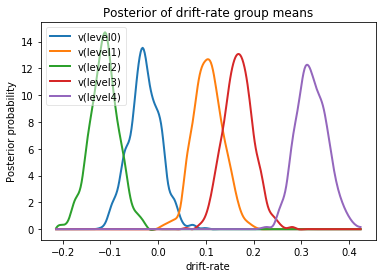

In [14]:
v_level0, v_level1, v_level2, v_level3, v_level4 = output[0].nodes_db.node[['v(level0)', 'v(level1)', 'v(level2)', 'v(level3)', 'v(level4)']]
hddm.analyze.plot_posterior_nodes([v_level0, v_level1, v_level2, v_level3, v_level4])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

In [16]:
print("P(0V0A > 0V1A) = ", 1 - (v_level1.trace() > v_level0.trace()).mean())
print("P(1V0A > 0V0A) = ", (v_level2.trace() > v_level0.trace()).mean())
print("P(1V1A > 0V0A) = ", 1- (v_level3.trace() > v_level1.trace()).mean())
print("P(1Vne1A > 0V0A) = ", 1- (v_level4.trace() > v_level3.trace()).mean())
print("P(1V0A > 0V1A) = ", 1- (v_level1.trace() > v_level2.trace()).mean())

P(0V0A > 0V1A) =  0.0020408163265306367
P(1V0A > 0V0A) =  0.027551020408163266
P(1V1A > 0V0A) =  0.07448979591836735
P(1Vne1A > 0V0A) =  0.0010204081632653184
P(1V0A > 0V1A) =  0.0


In [20]:
v_level0 = [None] * 200
v_level1 = [None] * 200
v_level2 = [None] * 200
v_level3 = [None] * 200
v_level4 = [None] * 200

p_level1_level0 = [None] * 200
p_level2_level0 = [None] * 200
p_level2_level1 = [None] * 200
p_level3_level1 = [None] * 200
p_level4_level3 = [None] * 200


for i in range(200):
    v_level0[i], v_level1[i], v_level2[i], v_level3[i], v_level4[i] = output[i].nodes_db.node[['v(level0)', 'v(level1)', 'v(level2)', 'v(level3)', 'v(level4)']]
    
    p_level1_level0[i] = 1 - (v_level1[i].trace() > v_level0[i].trace()).mean()
    p_level2_level0[i] = (v_level2[i].trace() > v_level0[i].trace()).mean()
    p_level2_level1[i] = 1 - (v_level1[i].trace() > v_level2[i].trace()).mean()
    p_level3_level1[i] = 1 - (v_level3[i].trace() > v_level1[i].trace()).mean()
    p_level4_level3[i] = 1 - (v_level4[i].trace() > v_level3[i].trace()).mean()


In [22]:
print("p_level1_level0", p_level1_level0)
print("p_level2_level0", p_level2_level0)
print("p_level2_level1", p_level2_level1)
print("p_level3_level1", p_level3_level1)
print("p_level4_level3", p_level4_level3)


p_level1_level0 [0.0020408163265306367, 0.0020408163265306367, 0.0020408163265306367, 0.0010204081632653184, 0.013265306122449028, 0.013265306122449028, 0.0, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.02346938775510199, 0.031632653061224536, 0.031632653061224536, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.019387755102040827, 0.01938

In [30]:
p_level1_level0 = np.array(p_level1_level0)
p_level2_level0 = np.array(p_level2_level0)
p_level2_level1 = np.array(p_level2_level1)
p_level3_level1 = np.array(p_level3_level1)
p_level4_level3 = np.array(p_level4_level3)

In [32]:
print("Power p_level1_level0", 1 - (p_level1_level0 > 0.05).mean())
print("Power p_level2_level0", 1 - (p_level2_level0 > 0.05).mean())
print("Power p_level2_level1", 1 - (p_level2_level1 > 0.05).mean())
print("Power p_level3_level1", 1 - (p_level3_level1 > 0.05).mean())
print("Power p_level4_level3", 1 - (p_level4_level3 > 0.05).mean())

power p_level1_level0 0.965
power p_level2_level0 0.945
power p_level2_level1 1.0
power p_level3_level1 0.945
power p_level4_level3 0.9299999999999999
